IT16111752 (working)

Vindula Illankoon

The dataset is used online from the cloud 

***Referred links***
*   Download:
links: https://www.kaggle.com/c/digit-recognizer/data?
*   From TensorFlow:
tf.keras.datasets.mnist.load_data(path='mnist.npz')

https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

https://www.youtube.com/watch?v=FTr3n7uBIuE

https://keras.io/layers/convolutional/

**Import the "MNIST digit" dataset online from the cloud**


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from keras import backend as K
from keras.utils import np_utils

mnist = tf.keras.datasets.mnist

# 28 x 28 images of numbers (0 - 9)
# Unpack Mnist hanwritten dataset into following numpy arrays
(x_train, y_train),(x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Fix random seed for reproducibility
seed = 1234
np.random.seed(seed)

In [0]:
# Original image shape
x_train.shape 

(60000, 28, 28)

**Visualizing data**

<function matplotlib.pyplot.show>

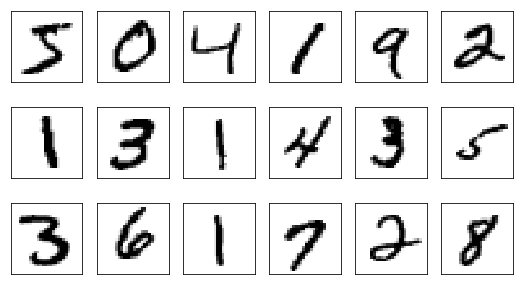

In [0]:
images = x_train[0:18]
fig, axes = plt.subplots(3, 6, figsize=[9,5])

for i, ax in enumerate(axes.flat):
    # Converts the colored images into binary images
    ax.imshow(x_train[i].reshape(28, 28),cmap=plt.cm.binary)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show

**Distribution of 10 digits**

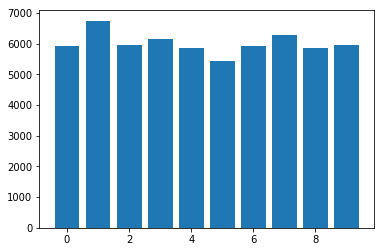

[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [0]:
counts = np.bincount(y_train)
nums = np.arange(len(counts))
plt.bar(nums, counts)
plt.show()
print(counts)

**Normalizing (Scaling) the feature set**

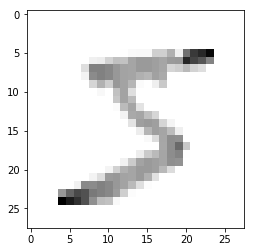

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Converts the colored images into binary images
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [0]:
# Final categories in target
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

**Reshaping the data**

In [0]:
# TensorFlow style 
# reshape : @param [samples: 60000], [width], [height], [pixels: binary image, 1 chanel]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

**Building the convolutional neural network**

In [0]:
tf.logging.set_verbosity(tf.logging.ERROR)

model = tf.keras.models.Sequential([
  
  # Convolutional layer   
  tf.keras.layers.Conv2D(30, (4, 4), activation='relu', input_shape=(28, 28, 1)),
    
  # Max pooling layer  
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
  # Convolutional layer     
  tf.keras.layers.Conv2D(60, (2, 2), activation='relu'),
    
  # Max pooling layer    
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  
  # Drop some weights to get rid of overfitting  
  tf.keras.layers.Dropout(0.25),
    
  # Flatten the input to reduce too many dimensions
  tf.keras.layers.Flatten(),
    
  # Two layers with having 128 and 20 nodes with rectified linear activation(relu) 
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
    
  # Last dense layer to output multi-class probabilities  
  tf.keras.layers.Dense(num_classes, activation='softmax')
])
 
# Optimization with adam  
model.compile(optimizer='adam',
              metrics=['accuracy'],
              loss='categorical_crossentropy')

In [0]:
# See the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 30)        510       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 60)        7260      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 60)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 60)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1500)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

**Training**

In [0]:
# Training the model
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=3, batch_size = 200, verbose = 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 - 32s - loss: 0.4162 - acc: 0.8746 - val_loss: 0.1060 - val_acc: 0.9705
Epoch 2/3
60000/60000 - 32s - loss: 0.1045 - acc: 0.9675 - val_loss: 0.0715 - val_acc: 0.9777
Epoch 3/3
60000/60000 - 32s - loss: 0.0729 - acc: 0.9772 - val_loss: 0.0478 - val_acc: 0.9852


**Testing**

In [0]:
# Testing
accuracy_scores = model.evaluate(x_test, y_test)

print("Error: %.2f%%" % (100 - accuracy_scores[1]*100))
print("Accuracy: %.2f%%" % (accuracy_scores[1]*100))

10000/10000 [==============================] - 2s 227us/sample - loss: 0.0478 - acc: 0.9852
Error: 1.48%
Accuracy: 98.52%


**Predictions**

The set of predicted values
[1.9441536e-07 2.7344824e-10 1.4697210e-08 8.8665784e-06 2.8141605e-08
 9.9977499e-01 1.7163994e-04 1.9180916e-08 2.1018948e-05 2.3210894e-05]

Predicted digit :  5
Probability of the digit being  5  is :  0.999775 



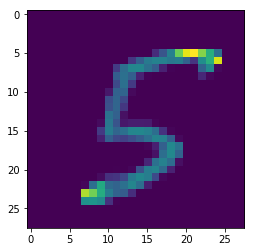

In [0]:
# index of the digit which we are going to test with
test_index = 23

# Predict with test data
predictions = model.predict(x_test)

# getting the highet probable digit
predicted_value = np.argmax(predictions[test_index])
  
print("The set of predicted values")
print(predictions[test_index])
print("\nPredicted digit : ", predicted_value)
print("Probability of the digit being ", predicted_value, " is : ", max(predictions[test_index]), "\n")

plt.imshow(x_test[test_index].reshape(28, 28))